
# Linear Interpolation and Numerical Differentiation



## 1. Linear Interpolation

Linear interpolation estimates unknown values between two known data points using the formula:

$$
y = y_0 + \frac{(x - x_0)(y_1 - y_0)}{x_1 - x_0}
$$


### Exercise- 
Find the linear interpolation value at x = 2.5 between the two unkown data points (1, 3) & (4, 12). Print your results.

In [4]:
# Your code here to complete the Linear Interpolation Function
def linear_interpolation(x0, y0, x1, y1, x):
    return y0+((x- x0)*(y1 - y0))/(x1 - x0)
(x0,y0)=(1,3)
(x1,y1)=(4,12)
x=2.5
y=linear_interpolation(x0, y0, x1, y1, x)
print(linear_interpolation(x0, y0, x1, y1, x)) 


7.5



## 2. Numerical Differentiation

Numerical differentiation estimates the derivative of a function using discrete data points.

- Forward Difference:
$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

- Backward Difference:
$$f'(x) \approx \frac{f(x) - f(x-h)}{h}$$

- Central Difference:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$


### Exercise- 
Find the derivative of f = sin (x) at x = pi/4 using foward difference, backward difference, and central difference. You decide the step size.

In [5]:
# Your code here
import math
def f(x):
    return math.sin(x)
x=math.pi/4
h=0.00001
def forward_dx(x,h):
    return (f(x+h)-f(x))/h
print("Forward: ",forward_dx(x,h))

def backward_dx(x,h):
    return (f(x)-f(x-h))/h
print("Backward: ",backward_dx(x,h))

def central_dx(x,h):
    return (f(x+h)-f(x-h))/(2*h)
print("Central: ",central_dx(x,h))

print("Cos(pi/4): ",math.cos(math.pi/4))
print("1/sqrt(2): ",1/math.sqrt(2))

Forward:  0.7071032456340552
Backward:  0.7071103167111125
Central:  0.7071067811725839
Cos(pi/4):  0.7071067811865476
1/sqrt(2):  0.7071067811865475



## 3. Numerical Differentiation Using Taylor Series

Implement numerical differentiation formulas for higher-order derivatives using Taylor series expansions. 


### Exercise- 
Using Taylor series, compute the first to fourth derivatives of the function f(x) = sin(x) and plot them from x= 0 to x= 2(pi). 

1st Derivative:  0.707106663335455
2nd Derivative:  -0.707106722397377
3rd Derivative:  -0.7071066510100366
4th Derivative:  0.7079892228034622


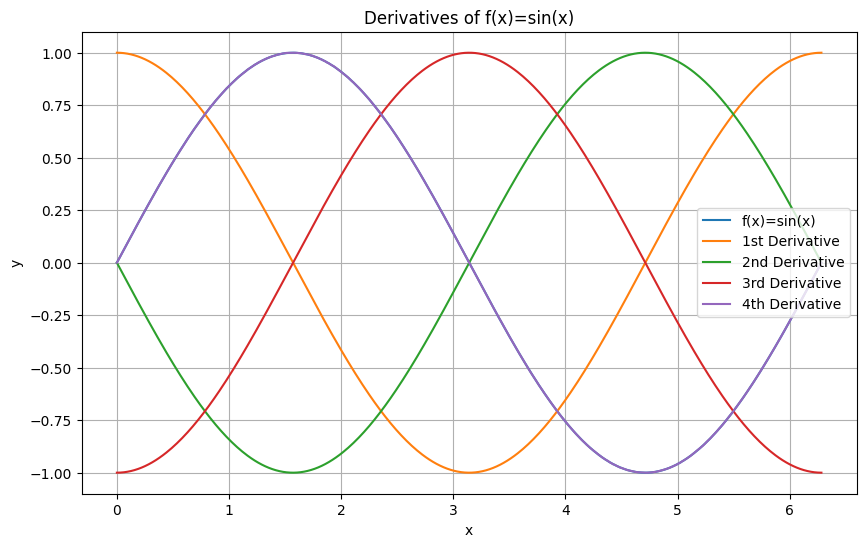

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return np.sin(x)
def df(x):
    return (f(x+h)-f(x-h))/(2*h)

print("1st Derivative: ",df(math.pi/4))
x=math.pi/4
h=0.001
def df2(x):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)
print("2nd Derivative: ",df2(math.pi/4))
def df3(x):
    return (f(x+2*h)-2*f(x+h)+2*f(x-h)-f(x-2*h))/(2*h**3)
print("3rd Derivative: ",df3(math.pi/4))

def df4(x):
    return (f(x+2*h)-4*f(x+h)+6*f(x)-4*f(x-h)+f(x-2*h))/(h**4)
print("4th Derivative: ",df4(math.pi/4))

x_vals=np.linspace(0,2*math.pi,400)
y1=df(x_vals)
y2=df2(x_vals)
y3=df3(x_vals)
y4=df4(x_vals)

plt.figure(figsize=(10,6))
plt.plot(x_vals,f(x_vals))
plt.plot(x_vals,y1)
plt.plot(x_vals,y2)
plt.plot(x_vals,y3)
plt.plot(x_vals,y4)
plt.legend(['f(x)=sin(x)','1st Derivative','2nd Derivative','3rd Derivative','4th Derivative'])
plt.title('Derivatives of f(x)=sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()  

### Engineering Problem: Beam Deflection Analysis

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$


#### 🎯 Task:
Given deflection data y(x) along a beam, estimate the bending moment M(x) and shear force V(x) using numerical differentiation and plot them. 

Equations:
$$ M(x) = -EI \frac{d^2 y}{dx^2}$$
$$ V(x) = \frac{dM}{dx} $$

#### 📌 Constants:
- L = 10 
- w = 5 
- E = 200e9
- I = 1e-6

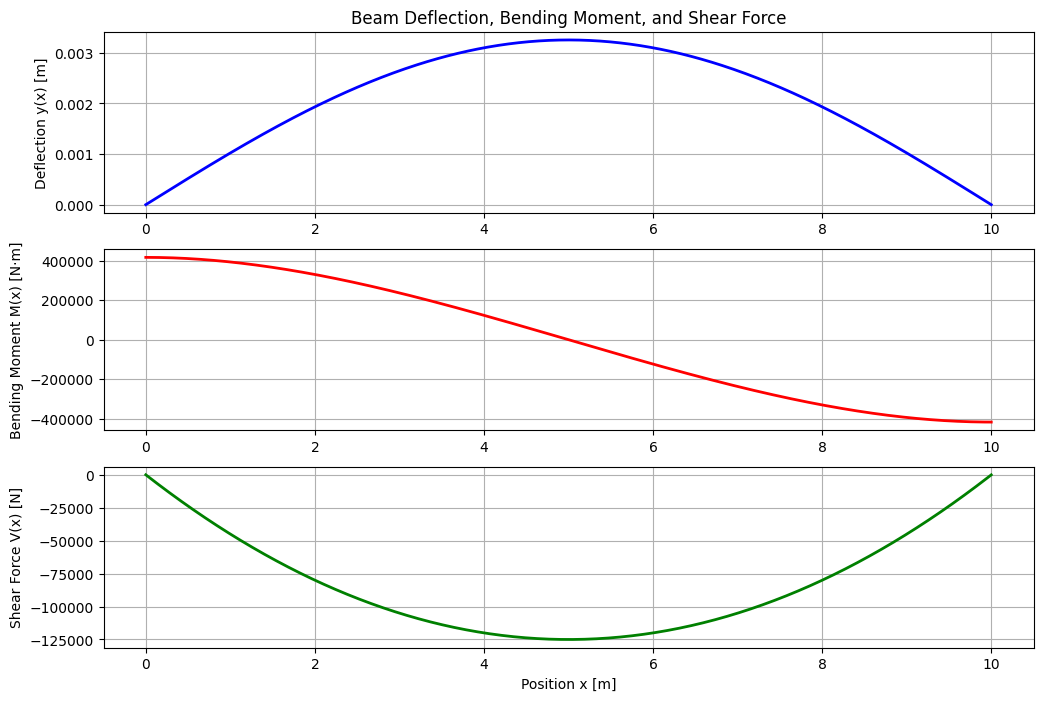

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
w = 5      # kN/m
L = 10     # m
E = 200e9  # Young's modulus in Pa
I = 1e-6   # Moment of inertia in m^4

# Your code here
def y(x):
    return (w)/(24*E*I)*x*(L**3-2*L*x**2+x**3)

h=0.001
def dy(x):
    return (y(x+h)-y(x-h))/(2*h)

def d_dy(x):
    return (y(x-h)-2*y(x)+y(x-h))/(h**2)


def M(x):
    return -E * I * d_dy(x)

def V(x):
    return (M(x + h) - M(x - h)) / (2 * h)

x_vals = np.linspace(0, L, 500)

y_vals = y(x_vals)
M_vals = M(x_vals)
V_vals = V(x_vals)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x_vals, y_vals, 'b', linewidth=2)
plt.ylabel('Deflection y(x) [m]')
plt.title('Beam Deflection, Bending Moment, and Shear Force')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(x_vals, M_vals, 'r', linewidth=2)
plt.ylabel('Bending Moment M(x) [N·m]')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(x_vals, V_vals, 'g', linewidth=2)
plt.ylabel('Shear Force V(x) [N]')
plt.xlabel('Position x [m]')
plt.grid(True)
plt.show()


## 4. Ordinary Differential Equations - Initial Value Problems

This notebook introduces Ordinary Differential Equations (ODEs) with a focus on Initial Value Problems (IVPs). We will explore numerical methods such as Euler's Method and Runge-Kutta Methods with examples and visualizations.



### What is an ODE?

An Ordinary Differential Equation (ODE) is an equation involving a function and its derivatives.

### Initial Value Problem (IVP)
An IVP is an ODE along with a specified value at a starting point:

$$\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0$$



#### (a) Euler's Method

Algorithm:
1. Choose step size \( h \)
2. Iterate: \( y_{n+1} = y_n + h f(x_n, y_n) \)
3. Repeat for desired number of steps


#### Exercise
Use Euler's Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

i= 9


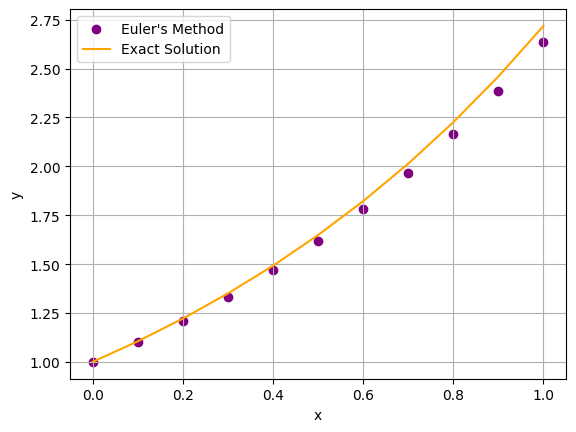

1.0


In [ ]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

h=0.1
steps=10

def f(x,y):
    return np.exp(x)

x0=0
y0=1
xs=[x0]
ys=[y0]

for i in range(steps):
    y0+=h * f(x0,y0)
    x0+=h
    xs.append(x0)
    ys.append(y0)
print("i=",i)

plt.scatter(xs,ys,label="Euler's Method",color='purple')
plt.plot(xs,np.exp(xs),label='Exact Solution',color='orange')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

#(dy/dx)=np.exp(x)
print(f(0,0))



#### (b) Runge-Kutta Method (RK4)

Algorithm:
1. Compute intermediate slopes:
   - \( k_1 = h f(x_n, y_n) \)
   - \( k_2 = h f(x_n + h/2, y_n + k_1/2) \)
   - \( k_3 = h f(x_n + h/2, y_n + k_2/2) \)
   - \( k_4 = h f(x_n + h, y_n + k_3) \)
2. Update: \( y_{n+1} = y_n + (k_1 + 2k_2 + 2k_3 + k_4)/6 \)


#### Exercise
Use RK4 Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

i= 19


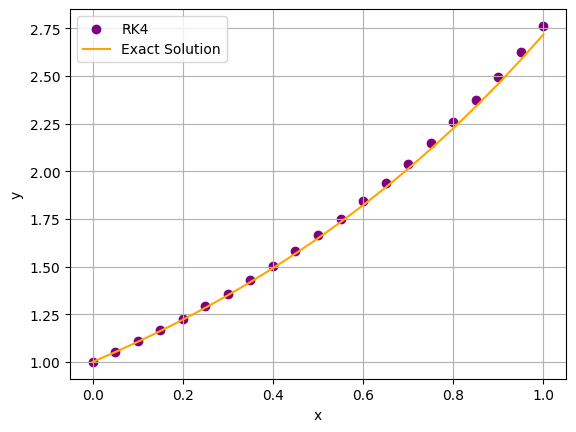

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h=0.05
steps=20

def f(x,y):
   return np.exp(x)


x0=0
y0=1
xs=[x0]
ys=[y0]


for i in range(steps):
    k1=h*f(x0,y0)
    k2=h*f(x0+h*2,y0+k1/2)
    k3=h*f(x0+h/2,y0+k2/2)
    k4=h*f(x0+h,y0+k3)
    y0+= (k1+2*k2+2*k3+k4)/6
    x0+=h
    xs.append(x0)
    ys.append(y0)
    
    
    

print("i=",i)

plt.scatter(xs,ys,label="RK4",color='purple')
plt.plot(xs,np.exp(xs),label='Exact Solution',color='orange')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()



# Numerical Integration Methods

This notebook provides an overview of common numerical integration methods, including Trapezoidal Rule, Simpson's Rule, and Gaussian Quadrature. Each method includes a step-by-step algorithm and example Python code.



## Trapezoidal Rule

### Algorithm:
1. Divide the interval [a, b] into n subintervals of equal width h = (b - a)/n.
2. Compute the sum: Integral ≈ (h/2) * [f(x₀) + 2f(x₁) + 2f(x₂) + ... + 2f(xₙ₋₁) + f(xₙ)].
3. Return the result.


Trapezoidal Approximation: 1.718296
Exact Integral: 1.718282
Absolute Error: 1.431899e-05


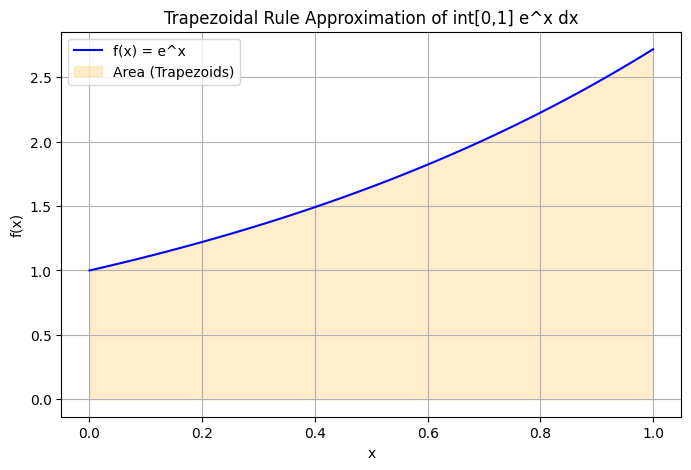

In [ ]:
#jake was here
import numpy as np
import matplotlib.pyplot as plt
a,b=0,1
n=100
x=np.linspace(a,b,n+1)

def trap_rule(f,a,b,n):
    h=(b-a)/n
    result=f(a)+f(b)
    for i in range(1,n):
        result+=2*f(a+i*h)
    return result*h/2

def f(x):
    return np.exp(x)

y=f(x)
trap_integral=trap_rule(f,a,b,n)

exact=np.e -1
error=abs(trap_integral - exact)

print(f"Trapezoidal Approximation: {trap_integral:.6f}")
print(f"Exact Integral: {exact:.6f}")
print(f"Absolute Error: {error:.6e}")

plt.figure(figsize=(8,5))
plt.plot(x, y, 'b', label='f(x) = e^x')
plt.fill_between(x, y, alpha=0.2, color='orange', label='Area (Trapezoids)')
plt.title('Trapezoidal Rule Approximation of int[0,1] e^x dx')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


## Simpson's Rule

### Algorithm:
1. Divide the interval [a, b] into an even number n of subintervals.
2. Compute the sum: Integral ≈ (h/3) * [f(x₀) + 4f(x₁) + 2f(x₂) + 4f(x₃) + ... + 4f(xₙ₋₁) + f(xₙ)].
3. Return the result.


Simpson's Approximation: 1.718283
Exact Integral: 1.718282
Absolute Error: 9.534658e-07


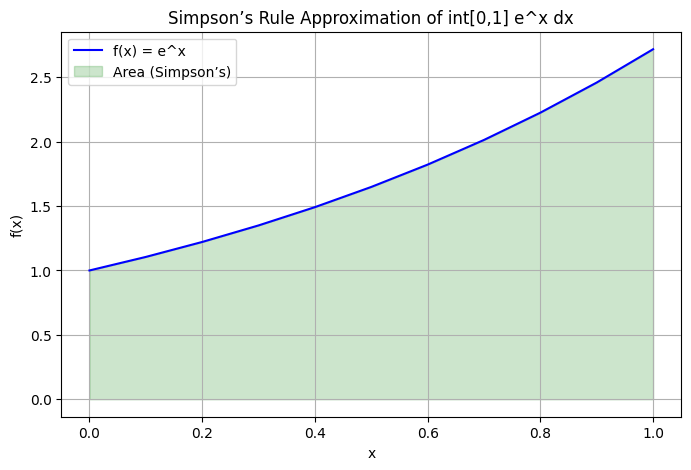

In [ ]:

a,b=0,1
n=10
x=np.linspace(a,b,n+1)

def simpson_rule(f,a,b,n):
    if n %2 !=0:
        raise ValueError("n must be even")
    h=(b-a)/n
    result=f(a)+f(b)
    for i in range(1,n):
        coeff=4 if i%2 !=0 else 2
        result += coeff*f(a+i*h)
    return result*h/3

simp_int=simpson_rule(f,a,b,n)
exact=np.e -1
error=abs(simp_int - exact)

print(f"Simpson's Approximation: {simp_int:.6f}")
print(f"Exact Integral: {exact:.6f}")
print(f"Absolute Error: {error:.6e}")

y=f(x)
plt.figure(figsize=(8,5))
plt.plot(x, y, 'b', label='f(x) = e^x')
plt.fill_between(x, y, alpha=0.2, color='green', label='Area (Simpson’s)')
plt.title('Simpson’s Rule Approximation of int[0,1] e^x dx')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

